# MLP classification code along

In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
X, y = raw_data.data, raw_data.target

print(f"Any nans? {np.isnan(X).any()}")
X.shape, y.shape

Any nans? False


((569, 30), (569,))

## Train|test split

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## MLP network

In [25]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer

def MLP():
    model = Sequential(name = "MLP")
    model.add(InputLayer(X.shape[1], name = "Input_layer"))
    model.add(Dense(32, name = "Hidden1", activation = "relu")) # change to he initializer
    model.add(Dense(32, name = "Hidden2", activation = "relu"))
    model.add(Dense(1, name = "Output", activation = "sigmoid"))

    model.compile(loss = "binary_crossentropy", optimizer = "adam")
    return model

print(f"Training parameters {(30+1)*32+(33*32)+33}")
model = MLP()
model.summary()

Training parameters 2081
Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(scaled_X_train, y_train, epochs = 500, validation_split=.2, verbose=1)

Epoch 1/500
12/12 [==============================] - 1s 17ms/step - loss: 0.5817 - val_loss: 0.4481
Epoch 2/500
12/12 [==============================] - 0s 7ms/step - loss: 0.4100 - val_loss: 0.3261
Epoch 3/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2949 - val_loss: 0.2396
Epoch 4/500
12/12 [==============================] - 0s 11ms/step - loss: 0.2173 - val_loss: 0.1829
Epoch 5/500
12/12 [==============================] - 0s 14ms/step - loss: 0.1666 - val_loss: 0.1503
Epoch 6/500
12/12 [==============================] - 0s 11ms/step - loss: 0.1356 - val_loss: 0.1310
Epoch 7/500
12/12 [==============================] - 0s 10ms/step - loss: 0.1140 - val_loss: 0.1199
Epoch 8/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0997 - val_loss: 0.1126
Epoch 9/500
12/12 [==============================] - 0s 9ms/step - loss: 0.0885 - val_loss: 0.1071
Epoch 10/500
12/12 [==============================] - 0s 10ms/step - loss: 0.0801 - val_loss: 0.1035
Ep

In [27]:
import pandas as pd 

df_loss = pd.DataFrame(model.history.history)
df_loss.head()

,loss,val_loss
0,0.581673,0.448077
1,0.410029,0.326105
2,0.294947,0.239582
3,0.217335,0.182949
4,0.166600,0.150326


<AxesSubplot:>

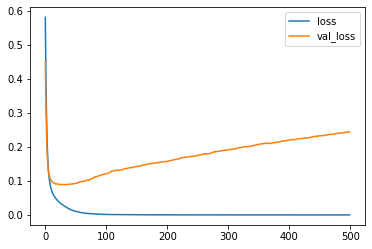

In [28]:
df_loss.plot()
# clear overfitting as validation loss increases after a certain amount of epochs

## Early stopping

In [30]:
model = MLP()
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 32)                992       
                                                                 
 Hidden2 (Dense)             (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(scaled_X_train, y_train, epochs = 50, validation_split=.2, verbose=1)

Epoch 1/50
12/12 [==============================] - 1s 29ms/step - loss: 0.5404 - val_loss: 0.4420
Epoch 2/50
12/12 [==============================] - 0s 9ms/step - loss: 0.3632 - val_loss: 0.3065
Epoch 3/50
12/12 [==============================] - 0s 10ms/step - loss: 0.2472 - val_loss: 0.2341
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.1830 - val_loss: 0.1913
Epoch 5/50
12/12 [==============================] - 0s 10ms/step - loss: 0.1442 - val_loss: 0.1655
Epoch 6/50
12/12 [==============================] - 0s 10ms/step - loss: 0.1196 - val_loss: 0.1485
Epoch 7/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1025 - val_loss: 0.1371
Epoch 8/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0900 - val_loss: 0.1293
Epoch 9/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0810 - val_loss: 0.1222
Epoch 10/50
12/12 [==============================] - 0s 10ms/step - loss: 0.0738 - val_loss: 0.1175
Epoch 11/50

<AxesSubplot:>

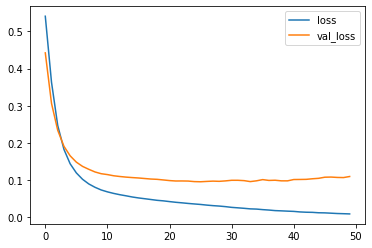

In [32]:
pd.DataFrame(model.history.history).plot()

In [33]:
model = MLP()
model.fit(scaled_X_train, y_train, epochs = 50, verbose=0)

## Prediction and evaluation

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



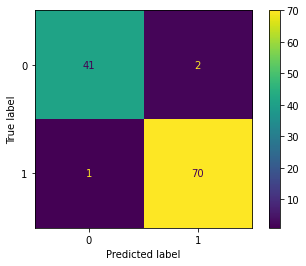

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(scaled_X_test)
y_pred = (y_pred > .5)*1

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
print(classification_report(y_test, y_pred))